<a href="https://colab.research.google.com/github/mattvanharn/GPT_from_scratch/blob/main/CVAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Variational Autoencoder (CVAE) With Residual Connections For Image Anomaly Detection on egg-data Dataset

### Author: Matt Van Harn

#### Requirements:
```
channels:
- conda-forge
- nvidia/label/cuda-11.8.0
dependencies:
- cuda-toolkit
- cudatoolkit=11.8.0
- ipykernel
- matplotlib
- pandas
- python=3.9
- scikit-learn
- seaborn
- tensorflow-probability
```


#### Problem Statement:

Problem Statement 1: A large part of the cost of a vision system is the edge computer hardware that runs the system. The efficiency and accuracy of the software that runs on this hardware determines the frame rate and therefore how many cameras can be connected to each computer.  The opportunities to improve this are in pipeline structure, model structure and tuning, language and environment choices, and optimal hardware utilization.

Problem Statement 2: Machine Vision in a mission critical system needs to be very robust.  In addition to the core detection model, an anomaly detection and diagnostics model/structure needs to be defined that can report a degradation of operating conditions and potential loss of operational performance. These detections could involve additional low frame rate models, statistical analysis of key metrics, "expert" condition recognition, etc, The type of anomalies should/could involve.

* Optical issues such as improper lighting and/or dirty lenses
* Mechanical issues such as improperly aligned/mounted cameras or obstructions    
* System issues such as damaged or malfunctioning machinery   
* Electronic and/or Network issues such as dropped packets or malfunctioning cameras   
* Product issues such as unusual results, foreign objects, and or unexpected operating modes

Business value: Efficiency gains and time savings in the pipeline. Faster turnaround, less time spent on training and optimization. MLOps. Additional storage into ML Flow. Prevent damage to belts by detecting objects.


#### Technical Approach:

At the outset of this project, my knowledge of anomaly detection was limited. To gain a better understanding, I extensively researched the topic and found the paper "Deep Industrial Image Anomaly Detection: A Survey," which provided valuable insights into various anomaly detection models. [1] I also summarized this paper in a document for reference. [2]

I learned that there are two main types of anomaly detection models: supervised and unsupervised. While supervised models require datasets with both normal and abnormal images, unsupervised models can work with only normal images. Given that the anomalies I needed to detect were unknown, I chose to use an unsupervised approach. Among the unsupervised methods, there are feature embedding based and reconstruction-based methods. While feature embedding-based methods use a classifier to distinguish normal from abnormal images, reconstruction-based methods utilize a decoder to reconstruct the original image and compare it with the input. As the paper suggested, reconstruction-based methods are less reliant on pre-trained models, making them more suitable for anomaly detection. Consequently, I opted to employ an autoencoder, a common and straightforward reconstruction-based model known for its excellent performance.

I initially discovered a GitHub page called Anomalib which featured the ability to easily deploy several different anomaly detection models, and even use them on your own datasets. [3] However, the page proved to be less user-friendly, leading me to encounter several errors and dependency issues. Thus, I decided to develop my own autoencoder model, which would grant me more control and would also allow me to better understand how autoencoder models worked.

I began to look into how autoencoders worked and learned about the different kinds of autoencoders. I began with implementing a simple autoencoder and observing the reconstructions, which were not very good. [4]


I soon realized that I needed a more complex model. I then came across the Convolutional Variational Autoencoder (CVAE) and implemented it following a TensorFlow tutorial. [5] A CVAE not only encodes the input image into a lower-dimensional latent space like a simple autoencoder does, but also learns a probability distribution of the latent space, allowing it to generate new images and produce better reconstructions. A blog post from mygreatlearning.com was useful for me in understanding the difference between autoencoders and variational autoencoders. [6] Using the variational autoencoder, I was able to get much better reconstructions, but they were still blurry and my model was not reconstructing images properly.

To address these issues, I experimented with different loss functions, latent space sizes, types of layers (such as dropout or batch normalization layers), and the number of layers. Eventually, I found that the ELBO loss function and the SSIM loss function performed the best. Additionally, I realized the significance of having a sufficiently large latent space and model complexity. Despite this, I was still not getting results I was happy with. I also implemented some metric calculations at this point to measure and record the results at this time.

Further enhancing the model's capabilities, I incorporated the feature perceptual loss and residual layers. The feature perceptual loss compares the differences in high-level features between images rather than pixel-level differences, enabling the model to focus on essential image characteristics. I learned about feature perceptual loss from a paper title “Detection of Anomalous Grapevine Berries Using Variational Autoencoders” [7]. I post from medium.com was also helpful in learning about perceptual loss. [8] Residual layers, which involve adding the input of a block to its output, helped solve the problem of vanishing gradients and improved convergence. I first learned about residual layers from a Stack Exchange post, then learned how they worked in more detail from blog post. [9][10]

This architecture sounded very promising because I was having trouble with my model quickly converging, yet the reconstructions were still blurry and the loss was plateauing. Implementing residual layers helped to solve this problem, and was definitely a key component to getting better reconstructions. Now that I had reconstructions I was satisfied with, I finally began to see some results in the metric calculations.

Throughout the experimentation, I calculated and recorded various metrics such as accuracy, precision, recall, F1 score, and AUC ROC score. Due to the dataset's imbalanced nature, I prioritized improving precision and recall over overall accuracy, as accurately detecting anomalies was of greater importance.

I encountered some difficulties in generating the metrics and obtaining desired results initially, but through iterations and improvements, I achieved promising precision and recall scores of 0.9909 and 0.7842, respectively. I aim to further enhance the recall score in future iterations.


[1] Deep Industrial Image Anomaly Detection: A Survey. (https://arxiv.org/pdf/2301.11514v3.pdf)

[2] Summary of "Deep Industrial Image Anomaly Detection: A Survey". (https://docs.google.com/document/d/1hAeDnXK2MmqO0nV-qvcs0Qr6wf0EVZ8IzhKqpMLlqkg)

[3] Anomalib (https://github.com/openvinotoolkit/anomalib)

[4] Intro to Autoencoders (https://www.tensorflow.org/tutorials/generative/autoencoder)

[5] Convolutional Variational Autoencoder (CVAE). (https://www.tensorflow.org/tutorials/generative/cvae)

[6] Understanding Variational Autoencoder (https://www.mygreatlearning.com/blog/understanding-variational-autoencoder/)

[7] Detection of Anomalous Grapevine Berries Using Variational Autoencoders (https://www.frontiersin.org/articles/10.3389/fpls.2022.729097/full)

[8] Perceptual Loss https://sanjivgautamofficial.medium.com/perceptual-loss-well-it-sounds-interesting-after-neural-style-transfer-d09a48b6fb7d

[9] What is the best architecture for Auto-Encoder for image reconstruction? https://datascience.stackexchange.com/questions/49709/what-is-the-best-architecture-for-auto-encoder-for-image-reconstruction

[10] Residual Networks. (https://bjlkeng.io/posts/residual-networks/)


### Imports

* Tensorflow 2.0 is the primary library used for this project.
* Numpy is used for some array manipulation.
* Matplotlib, seaborn, and pandas are used for data visualization.
* Sklearn is used for metric calculations.

In [1]:
running_in_colab = 'google.colab' in str(get_ipython())
%pip install wandb

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
import os
import time
import shutil
import argparse
import imageio
import PIL
import glob
import zipfile
import io
import wandb
from IPython import display
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [3]:
if running_in_colab:
  # Mount Google Drive
  from google.colab import drive
  drive.mount("/content/drive")

  # Unzip dataset
  if not os.path.exists("/content/test_sample"):
      !unzip -q "/content/drive/MyDrive/egg_data/egg_data.zip"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Check for CPU and GPU

In [4]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices("GPU"))
print(running_in_colab)

tf.Tensor(-206.44919, shape=(), dtype=float32)
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


### Initialize variables

- RESET and TRAIN are set to True to reset the model and train it from scratch.   
- If you want to load a saved model, set RESET to False and TRAIN to False.  
- If you want to load a saved model and train it further, set RESET to False and TRAIN to True.

- Set VISUALIZE_DATA to False if you don't want to see example images displayed, pixel values shown, SVD calculated, etc. Speeds up time to get to the training cell.

##### Data Loading Variables
- The image height, width, and batch size can be set here. The validation split determines how many good images are used  
for the datasets, and is used to balance the number of good and anomalous images in the test dataset. The chicken_houses  
variable determines which images to include in the training.

##### Model Variables
* Here, the model training variables are initialized.  

    * LATENT_DIM:
The latent_dim variable determines the size of the latent space. The size of the latent space determines the amount of  
data compression. Too much data compression will lead to underfitting, while too large of latent space leads to overfitting.

        [What is an appropriate size for a latent space of (variational) autoencoders and how it varies with the features of the images?](https://ai.stackexchange.com/questions/37272/what-is-an-appropriate-size-for-a-latent-space-of-variational-autoencoders-and?rq=1)

    * KERNEL_SIZE, STRIDE_SIZE, POOL_SIZE:
See links

    * activation_function:
The activation function can be set here.

[https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/](https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/)   
[https://stats.stackexchange.com/questions/296679/what-does-kernel-size-mean)](https://stats.stackexchange.com/questions/296679/what-does-kernel-size-mean)  

##### Loss Function Variables
* The loss function variables are initialized here. Either SSIM loss or ELBO loss can be selected. SSIM loss works by  
comparing the similarity between the original image and the reconstructed image. ELBO loss works by comparing the similarity  
between the original image and the reconstructed image, as well as the similarity between the latent space and a normal distribution.

* Feature perceptual loss is also used, and combined with the SSIM or ELBO loss. The feature perceptual loss works by  
comparing the similarity between the original image and the reconstructed image at different layers of the VGG19 network.  
The feature perceptual loss is used to improve the quality of the reconstructed image. The bias variables determine how  
much each loss function is weighted, since ELBO loss and SSIM loss output different values.


In [5]:
RESET = False
TRAIN = False
VISUALIZE_DATA = False
USE_WANDB = False

In [6]:
config = {
  # Initialize image loading variables
  "IMG_HEIGHT": 256,
  "IMG_WIDTH": 256,
  "BATCH_SIZE": 32, # Minimum batch size is 16 for SSIM loss to work
  "VALIDATION_SPLIT": 0.2,
  "SEED": 3,
  "chicken_houses": ["Fassio", "KITTI", "Ovation", "Rigtrup", "Rigtrup2", "Sunrise", "Sunrise2", "Sunrise3", "Sunrise4", "Willamette"], # ["Fassio", "KITTI", "Ovation", "Rigtrup", "Rigtrup2", "Sunrise", "Sunrise2", "Sunrise3", "Sunrise4", "Willamette"]

  # Initialize model parameters
  "EPOCHS": 500,
  "LATENT_DIM": 64,
  "ENCODER_KERNEL_SIZE": 4,
  "DECODER_KERNEL_SIZE": 3,
  "DROPOUT_RATE": 0.2,
  "POOL_SIZE": 2,
  "ENCODER_STRIDE_SIZE": 2,
  "DECODER_STRIDE_SIZE": 2,
  "NOISE_FACTOR": 0.0,
  "activation_function": "leaky_relu",
  "filters_list": [32, 64, 128], # [8, 16, 32, 64, 128, 256, 512, 1024, 2048]

  # Save the model every X epochs
  "SAVE_INTERVAL": 5,

  # Set loss biases
  "ELBO_LOSS_BIAS": 0.0,
  "SSIM_LOSS_BIAS": 1.0,
  "MSE_LOSS_BIAS": 1.0,
  "PERCEPTUAL_LOSS_BIAS": 1.0,

  # Choose directory to load the saved model from
  "saved_model": "/SSIM_512_512_2/"
}

run = wandb.init(project="egg_data_anomaly_detection", config=config) if USE_WANDB else wandb.init(project="egg_data_anomaly_detection", config=config, mode="disabled")

# Initialize image loading variables
IMG_HEIGHT = wandb.config["IMG_HEIGHT"]
IMG_WIDTH = wandb.config["IMG_WIDTH"]
BATCH_SIZE = wandb.config["BATCH_SIZE"] # Minimum batch size is 16 for SSIM loss to work
VALIDATION_SPLIT = wandb.config["VALIDATION_SPLIT"]
SEED = wandb.config["SEED"]
chicken_houses = wandb.config["chicken_houses"]

# Initialize model parameters
EPOCHS = wandb.config["EPOCHS"]
LATENT_DIM = wandb.config["LATENT_DIM"]
ENCODER_KERNEL_SIZE = wandb.config["ENCODER_KERNEL_SIZE"]
DECODER_KERNEL_SIZE = wandb.config["DECODER_KERNEL_SIZE"]
DROPOUT_RATE = wandb.config["DROPOUT_RATE"]
POOL_SIZE = wandb.config["POOL_SIZE"]
ENCODER_STRIDE_SIZE = wandb.config["ENCODER_STRIDE_SIZE"]
DECODER_STRIDE_SIZE = wandb.config["DECODER_STRIDE_SIZE"]
NOISE_FACTOR = wandb.config["NOISE_FACTOR"]
activation_function = wandb.config["activation_function"] # "leaky_relu
filters_list = wandb.config["filters_list"] # [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
# Save the model every X epochs
SAVE_INTERVAL = wandb.config["SAVE_INTERVAL"]

# Set loss biases
ELBO_LOSS_BIAS = wandb.config["ELBO_LOSS_BIAS"]
SSIM_LOSS_BIAS = wandb.config["SSIM_LOSS_BIAS"]
MSE_LOSS_BIAS = wandb.config["MSE_LOSS_BIAS"]
PERCEPTUAL_LOSS_BIAS = wandb.config["PERCEPTUAL_LOSS_BIAS"]

# Choose directory to load the saved model from
saved_model = wandb.config["saved_model"]

dataset_directory_root = "/content" if running_in_colab else "/home/matt/repos/datasets/egg_data"
anomaly_detection_directory_root = "/content/drive/MyDrive/anomaly_detection" if running_in_colab else "/home/matt/repos/anomaly_detection"

vgg = tf.keras.applications.VGG19(
    include_top=False, weights="imagenet", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
)
vgg.trainable = False
# loss_model = tf.keras.Model(
#     inputs=vgg.input, outputs=vgg.get_layer("block4_conv4").output
# )
selectedLayers = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]
selectedOutputs = [vgg.get_layer(name).output for name in selectedLayers]
loss_model = tf.keras.Model(inputs=vgg.input, outputs=selectedOutputs)
vgg.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Initialize the number of examples to generate
NUM_EXAMPLES_TO_GENERATE = 16
good_batch = None
anomalous_batch = None

# Initialize SVD dimension tracking
max_dimensions = 0

# Initialize the prediction variables
reconstruction_loss = []
k_values = np.arange(0.5, 4.0, 0.1)
thresholds = []
all_good_test_predictions = []
all_good_test_true_labels = []
all_easy_test_predictions = []
all_easy_test_true_labels = []
all_medium_test_predictions = []
all_medium_test_true_labels = []
all_hard_test_predictions = []
all_hard_test_true_labels = []
all_predictions = []
all_true_labels = []
incorrect_images = []
incorrect_losses = []

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

### Data Loading and Preprocessing
The dataset used in this project comprises images of eggs on conveyor belts, where each image is associated with a label: 0 for good images and 1 for anomalous images. To facilitate model training and evaluation, the dataset is split into three subsets: train, validation, and test datasets. Since autoencoders are unsupervised, only the test dataset contains anomalous images. The train dataset is used to train the autoencoder, the validation dataset is employed to determine the reconstruction error threshold for anomaly detection, and the test dataset is utilized to evaluate the performance of anomaly detection.

During data loading, the good images are read from storage and distributed among the train and validation datasets. On the other hand, the anomalous images are read and appended to the test dataset. The labels for the anomalous images are created using the tf.map function.

After loading the images into the appropriate datasets, the images undergo preprocessing. Random horizontal and vertical flips are applied to augment the data, followed by normalization to rescale pixel values to the range [0, 1].

The configure_for_performance() function is then applied to the datasets, incorporating caching, shuffling, and prefetching for optimized performance.


In [7]:
# @title
def load_data(dataset_type):
    """
    This function loads the egg dataset and prepares it for training
    """

    # Store datasets in a list
    datasets = []
    tf.random.set_seed(SEED)

    anomalous_image_path = f"{dataset_directory_root}/anomalous_all"

    def configure_for_performance(dataset):
        """This function configures the dataset for performance"""
        dataset = dataset.cache()
        dataset = dataset.shuffle(buffer_size=1000)
        dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
        return dataset

    def preprocess_images(images):
        """This function applies preprocessing to the images"""

        # Resize images
        images = tf.image.resize(images, [IMG_HEIGHT, IMG_WIDTH])

        if dataset_type == "train":
          # Augment the training images
          images = tf.image.random_flip_left_right(images)
          images = tf.image.random_flip_up_down(images)
          images = tf.image.random_brightness(images, max_delta=0.1)
          images = tf.image.random_contrast(images, lower=0.1, upper=0.2)
          images = tf.image.random_saturation(images, lower=0.5, upper=1.5)
          # images = tf.image.random_hue(images, max_delta=0.2)
          noise = tf.random.normal(shape=tf.shape(images), mean=0., stddev=1.)
          images = images + noise

        # Min-Max normalization to [0, 1]
        images_min = tf.reduce_min(images, axis=[1, 2], keepdims=True)
        images_max = tf.reduce_max(images, axis=[1, 2], keepdims=True)
        images = (images - images_min) / (images_max - images_min)

        # Shift to [-1, 1]
        images = 2*images - 1

        return images

    # Load the good images from each chicken house
    for chicken_house in chicken_houses:

        # Define the good data directories
        good_image_path = f"{dataset_directory_root}/good_all/{chicken_house}"

        # The decision of which subset to load depends on dataset_type
        if dataset_type == "train":
            subset = "training"
        else:
            subset = "validation"

        good_image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            good_image_path,
            validation_split=VALIDATION_SPLIT,
            subset=subset,
            seed=SEED,
            batch_size=BATCH_SIZE,
        )

        if dataset_type in ["val", "test"]:
            # Calculate the number of batches for validation and test sets
            total_num_batches = tf.data.experimental.cardinality(good_image_dataset)
            validation_batches = total_num_batches // 2
            test_batches = total_num_batches - validation_batches

            # Split the validation and test sets
            if dataset_type == "val":
                good_image_dataset = good_image_dataset.take(validation_batches)
            elif dataset_type == "test":
                good_image_dataset = good_image_dataset.skip(validation_batches)

        # Append the datasets to the list
        datasets.append(good_image_dataset)

    # Concatenate the datasets
    dataset = tf.data.Dataset.sample_from_datasets(datasets)

    # Load the anomalous images for test only
    if dataset_type == "test":
        anomalous_image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            anomalous_image_path,
            seed=SEED,
            batch_size=BATCH_SIZE,
        )

        # Assign labels to anomalous images
        anomalous_image_dataset = anomalous_image_dataset.map(lambda x, y: (x, tf.ones_like(y)))
        # Concatenate anomalous images with the test set
        dataset = dataset.concatenate(anomalous_image_dataset)

    # Ensure the training dataset contains only full batches
    if dataset_type == "train":
        dataset = dataset.unbatch().batch(BATCH_SIZE, drop_remainder=True)

    # Preprocess the images
    dataset = dataset.map(lambda x, y: (preprocess_images(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    # Configure the datasets for performance
    dataset = configure_for_performance(dataset)

    return dataset

### Load Data

In [8]:
# train_dataset = load_data("train")
# validation_dataset = load_data("val")
# test_dataset = load_data("test")

### Load Predefined Datasets

In [9]:
# @title
def load_predefined_datasets():
    """
    This function loads the egg dataset and prepares it for training
    """

    # Define the dataset paths
    train_image_path = f"{dataset_directory_root}/good_train_large"
    validation_image_path = f"{dataset_directory_root}/good_validate"
    test_image_path = f"{dataset_directory_root}/good_test"
    easy_anomalous_image_path = f"{dataset_directory_root}/anomalous_easy"
    medium_anomalous_image_path = f"{dataset_directory_root}/anomalous_medium"
    hard_anomalous_image_path = f"{dataset_directory_root}/anomalous_hard"
    test_sample_path = f"{dataset_directory_root}/test_sample"


    def configure_for_performance(dataset):
        """This function configures the dataset for performance"""
        dataset = dataset.cache()
        # dataset = dataset.shuffle(buffer_size=1000)
        dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
        return dataset

    def preprocess_images(images, augment=False):
        """This function applies preprocessing to the images"""

        # Resize images
        images = tf.image.resize(images, [IMG_HEIGHT, IMG_WIDTH])

        if augment:
          # Augment the training images
          images = tf.image.random_flip_left_right(images)
          images = tf.image.random_flip_up_down(images)
          images = tf.image.random_brightness(images, max_delta=0.1)
          images = tf.image.random_contrast(images, lower=0.1, upper=0.2)
          images = tf.image.random_saturation(images, lower=0.5, upper=1.5)
          # images = tf.image.random_hue(images, max_delta=0.2)
          noise = tf.random.normal(shape=tf.shape(images), mean=0., stddev=1.)
          images = images + noise

        # Min-Max normalization to [0, 1]
        images_min = tf.reduce_min(images, axis=[1, 2], keepdims=True)
        images_max = tf.reduce_max(images, axis=[1, 2], keepdims=True)
        images = (images - images_min) / (images_max - images_min)

        # Shift to [-1, 1]
        images = 2*images - 1

        return images

    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        train_image_path,
        seed=SEED,
        batch_size=BATCH_SIZE,
    )

    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        validation_image_path,
        seed=SEED,
        batch_size=BATCH_SIZE,
    )

    good_test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        test_image_path,
        seed=SEED,
        batch_size=BATCH_SIZE,
    )

    easy_anomalous_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        easy_anomalous_image_path,
        seed=SEED,
        batch_size=BATCH_SIZE,
    )

    medium_anomalous_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        medium_anomalous_image_path,
        seed=SEED,
        batch_size=BATCH_SIZE,
    )

    hard_anomalous_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        medium_anomalous_image_path,
        seed=SEED,
        batch_size=BATCH_SIZE,
    )

    test_sample = tf.keras.preprocessing.image_dataset_from_directory(
        test_sample_path,
        batch_size=BATCH_SIZE,
        shuffle=False,
    )

    # Assign labels to anomalous images
    easy_anomalous_dataset = easy_anomalous_dataset.map(lambda x, y: (x, tf.ones_like(y)))
    medium_anomalous_dataset = medium_anomalous_dataset.map(lambda x, y: (x, tf.ones_like(y)))
    hard_anomalous_dataset = medium_anomalous_dataset.map(lambda x, y: (x, tf.ones_like(y)))

    # Ensure the training dataset contains only full batches
    train_dataset = train_dataset.unbatch().batch(BATCH_SIZE, drop_remainder=True)

    # Preprocess the images
    train_dataset = train_dataset.map(lambda x, y: (preprocess_images(x, augment=True), y), num_parallel_calls=tf.data.AUTOTUNE)
    validation_dataset = validation_dataset.map(lambda x, y: (preprocess_images(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    good_test_dataset = good_test_dataset.map(lambda x, y: (preprocess_images(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    easy_anomalous_dataset = easy_anomalous_dataset.map(lambda x, y: (preprocess_images(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    medium_anomalous_dataset = medium_anomalous_dataset.map(lambda x, y: (preprocess_images(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    hard_anomalous_dataset = hard_anomalous_dataset.map(lambda x, y: (preprocess_images(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    test_sample = test_sample.map(lambda x, y: (preprocess_images(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    # Configure the datasets for performance
    train_dataset = configure_for_performance(train_dataset)
    validation_dataset = configure_for_performance(validation_dataset)
    good_test_dataset = configure_for_performance(good_test_dataset)
    easy_anomalous_dataset = configure_for_performance(easy_anomalous_dataset)
    medium_anomalous_dataset = configure_for_performance(medium_anomalous_dataset)
    hard_anomalous_dataset = configure_for_performance(hard_anomalous_dataset)
    test_sample = test_sample.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

    # Convert test_sample to eager tensor and remove labels
    test_sample_images = []
    for images, _ in test_sample:
      test_sample_images.append(images)
    test_sample_tensor = tf.concat(test_sample_images, axis=0)

    return train_dataset, validation_dataset, good_test_dataset, easy_anomalous_dataset, medium_anomalous_dataset, hard_anomalous_dataset, test_sample_tensor

In [10]:
train_dataset, validation_dataset, test_dataset_good, test_dataset_easy, test_dataset_medium, test_dataset_hard, test_sample = load_predefined_datasets()

Found 4609 files belonging to 1 classes.
Found 900 files belonging to 1 classes.
Found 900 files belonging to 1 classes.
Found 112 files belonging to 1 classes.
Found 960 files belonging to 1 classes.
Found 960 files belonging to 1 classes.
Found 16 files belonging to 1 classes.


In [11]:
print(type(train_dataset))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


### Single Value Decomposition

Single Value Decomposition can be used to see the number of latent variables that are needed for the data. I did this to  
see how many latent dimensions I might need for my data, but only as a starting point. The number of latent dimensions  
still requires trial and error to determine the right number of latent dimensions.

In [12]:
if VISUALIZE_DATA:
  for images, _ in train_dataset.take(1):
      for image in images:
          A = image.numpy()

          # separate the color channels
          R = A[:,:,0]
          G = A[:,:,1]
          B = A[:,:,2]

          # perform Singular-value decomposition
          R_U, R_S, R_VT = np.linalg.svd(R)
          G_U, G_S, G_VT = np.linalg.svd(G)
          B_U, B_S, B_VT = np.linalg.svd(B)

          # Set the theshold for the singular values
          R_SVD_threshold = np.percentile(R_S, 90)
          G_SVD_threshold = np.percentile(G_S, 90)
          B_SVD_threshold = np.percentile(B_S, 90)

          R_indices = np.where(R_S > R_SVD_threshold)[0]
          G_indices = np.where(G_S > G_SVD_threshold)[0]
          B_indices = np.where(B_S > B_SVD_threshold)[0]

          print(f"Number of R singular values above the threshold: {len(R_indices)}")
          print(f"Number of G singular values above the threshold: {len(G_indices)}")
          print(f"Number of B singular values above the threshold: {len(B_indices)}")

          import numpy as np

          # Assume "s" is a 1-D array of singular values in descending order
          cumulative_variance = np.cumsum(R_S**2)
          total_variance = cumulative_variance[-1]
          variance_threshold = 0.99 * total_variance  # 99% threshold

          num_dimensions = np.searchsorted(cumulative_variance, variance_threshold) + 1

          print(f"Number of dimensions required to retain 99% variance: {num_dimensions}")

          if num_dimensions > max_dimensions:
            max_dimensions = num_dimensions


          # Singular values for each color channel
          plt.plot(R_S)
          plt.title("Singular Values for Red Channel")
          plt.xlabel("Index")
          plt.ylabel("Singular Value")
          plt.show()

          plt.plot(G_S)
          plt.title("Singular Values for Green Channel")
          plt.xlabel("Index")
          plt.ylabel("Singular Value")
          plt.show()

          plt.plot(B_S)
          plt.title("Singular Values for Blue Channel")
          plt.xlabel("Index")
          plt.ylabel("Singular Value")
          plt.show()

  print(f"Max Dimensions: {max_dimensions}")

### Check Minimum and Maximum Pixel Values

Here I am ensuring that the data was normalized to the range [-1, 1] as expected.

In [13]:
if VISUALIZE_DATA:
  for images, _ in train_dataset.take(1):
      for image in images:
          min_pixel_value = tf.reduce_min(image)
          max_pixel_value = tf.reduce_max(image)

      print(f"Minimum pixel value: {min_pixel_value}")
      print(f"Maximum pixel value: {max_pixel_value}")

### Visualize Data

I use this section to visually confirm that the data was loaded properly.

In [14]:
def display_images(dataset, num_images=9):
    images_to_display = []

    for batch in dataset.take(1):
        for i in range(min(num_images, len(batch[0]))):  # batch[0] contains the images
            # Rescale the pixel values back to the range of 0 to 255
            rescaled_image = ((batch[0][i].numpy() + 1) * 127.5).astype("uint8")
            images_to_display.append(rescaled_image)

    fig, axes = plt.subplots(3, 3, figsize=(6, 6))
    axes = axes.ravel()

    for i, ax in enumerate(axes):
        if i < len(images_to_display):
            ax.imshow(images_to_display[i])
            ax.set_title(f"Image {i+1}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

if VISUALIZE_DATA:
  display_images(train_dataset)

### Define Loss Functions

From GPT-4:
The perceptual loss is computed using the VGG19 model, which is a pre-trained  
convolutional neural network that has been trained on a large dataset of images (ImageNet).  
The VGG19 model is used to extract high-level features from the images.  
Specifically, the output from the 'block5_conv4' layer of the VGG19 model is used.  
This layer is deep into the network and therefore provides a high-level representation of the image.  

The perceptual loss is then computed as the mean squared error between the high-level  
features of the true image and the high-level features of the predicted image.  
This encourages the model to generate images that not only look similar to the  
true images at a pixel level, but also have similar high-level features.  
This can lead to more realistic generated images.  

In the training step, the perceptual loss is added to the other components of the loss function.  
The other components are the log probability of the encoded representation  
under a standard normal distribution (logpz) and the log probability of the  
encoded representation under the distribution predicted by the encoder (logqz_x).  
The perceptual loss is subtracted from the sum of logpz and logqz_x because  
we want to minimize the perceptual loss, but maximize the other two components.  

In summary, the perceptual loss encourages the model to generate images that  
not only have similar pixel values to the true images, but also have similar high-level features.  
This can lead to more realistic and high-quality generated images.  

In [15]:
def log_normal_pdf(sample, mean, logvar, raxis=1):
    """
    This function computes the log normal probability density function
    """
    log2pi = tf.math.log(2.0 * np.pi)
    return tf.reduce_sum(
        -0.5 * ((sample - mean) ** 2.0 * tf.exp(-logvar) + logvar + log2pi), axis=raxis
    )

def compute_perceptual_loss(y_true, y_pred):
    """
    Compute the perceptual loss
    """
    y_true_features = loss_model(y_true)
    y_pred_features = loss_model(y_pred)

    # Initialize perceptual loss
    perceptual_loss = 0.0

    # Compute MSE for each pair of feature maps and add to perceptual loss
    for y_true_feature, y_pred_feature in zip(y_true_features, y_pred_features):
        perceptual_loss += tf.reduce_mean(tf.square(y_true_feature - y_pred_feature))

    # Average perceptual loss
    perceptual_loss /= len(y_true_features)

    return perceptual_loss


def compute_ssim_loss_rgb(y_true, y_pred):
    """
    Computes the SSIM loss between the original input data x and the
    reconstructed data x_logit. This is part of the reconstruction loss in the SSIM loss.
    """
    ssim_r = tf.image.ssim(y_true[..., 0], y_pred[..., 0], max_val=2.0)
    ssim_g = tf.image.ssim(y_true[..., 1], y_pred[..., 1], max_val=2.0)
    ssim_b = tf.image.ssim(y_true[..., 2], y_pred[..., 2], max_val=2.0)
    return 1 - tf.reduce_mean((ssim_r + ssim_g + ssim_b) / 3.0)

# TODO: There are issues when using ELBO loss.
def compute_elbo_loss(x, x_logit, z, mean, logvar):
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)


def compute_loss(model, x):

    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_logit = model.decode(z)

    elbo_loss = compute_elbo_loss(x, x_logit, z, mean, logvar) if ELBO_LOSS_BIAS > 0. else 0.

    ssim_loss = compute_ssim_loss_rgb(x, x_logit) if SSIM_LOSS_BIAS > 0. else 0.

    mse_loss = tf.reduce_mean(tf.keras.losses.mse(x, x_logit)) if MSE_LOSS_BIAS > 0. else 0.

    perceptual_loss = compute_perceptual_loss(x, x_logit) if PERCEPTUAL_LOSS_BIAS > 0. else 0.

    total_loss = (ELBO_LOSS_BIAS * elbo_loss) + (SSIM_LOSS_BIAS * ssim_loss) + (MSE_LOSS_BIAS * mse_loss) + (PERCEPTUAL_LOSS_BIAS * perceptual_loss)

    return total_loss, elbo_loss, ssim_loss, mse_loss, perceptual_loss

In [16]:
# TODO: If ELBO loss is fixed, then ELBO loss with Monte Carlo could give more accurate results

        # losses = []  # list to keep each MC sample's loss
        # for _ in range(num_mc_samples):

        #     # Encode the input data x into a latent space. The encoder part of the CVAE
        #     # model is used here. The encoder outputs two things: a mean and a log variance.
        #     # These two parameters represent a distribution of the latent variables.
        #     mean, logvar = model.encode(x)

        #     # Reparameterize the mean and the log variance to sample from the latent distribution.
        #     # This is done to allow backpropagation through the random node.
        #     z = model.reparameterize(mean, logvar)

        #     # Decode the sampled latent variables z back into the original data space.
        #     # The decoder part of the CVAE model is used here.
        #     x_logit = model.decode(z)

        #     # Compute the cross-entropy loss between the original input data x and the
        #     # reconstructed data x_logit. This is part of the reconstruction loss in the ELBO loss.

        #     cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
        #     # Compute the negative sum of the cross-entropy loss across the dimensions
        #     # specified by axis=[1, 2, 3]. This is the final reconstruction loss.
        #     logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])

        #     # Compute the log probability of the sampled latent variables z under a standard
        #     # normal distribution. This is part of the KL divergence in the ELBO loss.
        #     logpz = log_normal_pdf(z, 0., 0.)

        #     # Compute the log probability of the samples latent variables z under the distribution
        #     # predicted by the encoder. This is also part of the KL divergence in the ELBO loss.
        #     logqz_x = log_normal_pdf(z, mean, logvar)

        #     # Compute the ELBO loss per data in the batch using sampled z, which will be negated to maximize ELBO
        #     elbo = logpx_z + logpz - logqz_x
        #     # Get negative of the ELBO loss for each data point in batch

        #     losses.append(elbo)

        # # Get mean of losses for each data point in batch over MC samples, resulting in one total loss value per datum
        # main_loss = tf.reduce_mean(losses, axis=0)
        # # Average it over mini-batch
        # main_loss = tf.reduce_mean(main_loss)

### Define Training Step

In [17]:
@tf.function
def train_step(
    model, x, optimizer
):
    """
    Executes one training step and returns the loss

    This function computes the loss and gradients, and uses the latter to
    update the model's parameters.
    """
    with tf.GradientTape() as tape:
      loss, elbo_loss, ssim_loss, mse_loss, perceptual_loss = compute_loss(model, x)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss, elbo_loss, ssim_loss, mse_loss, perceptual_loss

### Display Original and Reconstructed Images During Training

This function displays the original and reconstructed images side by side as a way to visualise how the model is  
performing during training. These images are also saved to a specified directory so that they can be used to compare  
the performance of different models, as well as be converted into a GIF to view the whole training process.

In [18]:
def generate_and_save_images(model, epoch, test_sample):
    mean, logvar = model.encode(test_sample)
    z = model.reparameterize(mean, logvar)
    predictions = model.sample(z)

    fig, axs = plt.subplots(4, 8, figsize=(20, 12))  # Increase figsize for larger image size

    # Display original images
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(((test_sample[4 * i + j, :, :, :] + 1) * 127.5).astype("uint8"))
            axs[i, j].set_title(f"{4 * i + j}", fontsize=20)
            axs[i, j].axis("off")

    # Display reconstructed images
    for i in range(4):
        for j in range(4):
            axs[i, j + 4].imshow(((predictions[4 * i + j, :, :, :] + 1) * 127.5).astype("uint8"))
            axs[i, j + 4].set_title(f"{4 * i + j}", fontsize=20)
            axs[i, j + 4].axis("off")

    # Add label for epoch number
    fig.text(0.5, 1.01, f"Epoch: {epoch:04d}", ha="center", va="center", fontsize=25)

    # Add labels for Original Images and Reconstructed Images
    fig.text(0.25, 1.01, "Original Images", ha="center", va="center", fontsize=25)
    fig.text(0.75, 1.01, "Reconstructed Images", ha="center", va="center", fontsize=25)

    # Add labels for Good Images and Anomalous Images
    fig.text(0.00, 0.75, "Good Images", ha="center", va="center", rotation="vertical", fontsize=25)
    fig.text(0.00, 0.25, "Anomalous Images", ha="center", va="center", rotation="vertical", fontsize=25)

    # Remove placeholder subplots
    for i in range(4):
        for j in range(4):
            axs[i, j + 4].axis("off")

    # Adjust plot settings
    fig.tight_layout(pad=4.0)  # Add padding/margins to the figure

    # tight_layout minimizes the overlap between 2 sub-plots
    plt.tight_layout()
    plt.savefig(f"{anomaly_detection_directory_root}/saved_images/image_at_epoch_{epoch:04d}.png")
    plt.show()

### Create a Test Sample to Display During Training

This creates the test sample of images that will be viewed during training. The test sample consists of 8 good images  
and 8 anomalous images because I want to see how the model is performing on both types of images.

In [19]:
# for images, labels in validation_dataset:
#     if len(images) < NUM_EXAMPLES_TO_GENERATE // 2:
#       continue

#     # Get the first batch of good images
#     if labels[0] == 0:
#         good_batch = images

# for images, labels in test_dataset_medium:
#     if len(images) < NUM_EXAMPLES_TO_GENERATE // 2:
#         continue

#     # Get the first batch of anomalous images
#     if labels[0] == 1:
#         anomalous_batch = images

# good_sample = good_batch[0 : NUM_EXAMPLES_TO_GENERATE // 2, :, :, :]
# anomalous_sample = anomalous_batch[0 : NUM_EXAMPLES_TO_GENERATE // 2, :, :, :]

# # Concatenate the good and anomalous images
# test_sample = tf.concat([good_sample, anomalous_sample], axis=0)

### Define the Model Architecture
The initial model architecture implemented in this project consists of an encoder and a decoder, supplemented with layers like batch normalization and dropout to prevent overfitting. After experimenting with this architecture and realizing something more complex was needed, residual layers were incorporated into the model to address the problem of vanishing gradients. Residual blocks are used, which allow the gradients to flow backward through the block without diminishing, thereby aiding in convergence and improving the quality of reconstructions.

#### Original Model Architecture

In [20]:
class CVAE1(tf.keras.Model):
    """
    This class defines the convolutional variational autoencoder (CVAE) model

    AutoEncoder architecture and feature perceptual loss inspired by:
    https://www.frontiersin.org/articles/10.3389/fpls.2022.729097/full)

    Positioning of batch normalization layers inspired by:
    https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md
    """

    def __init__(
        self,
        latent_dim,
        img_height,
        img_width,
        encoder_kernel_size,
        decoder_kernel_size,
        activation_function,
        dropout_rate,
        encoder_stride_size,
        decoder_stride_size,
    ):
        super(CVAE1, self).__init__()
        self.latent_dim = latent_dim
        self.img_height = img_height
        self.img_width = img_width
        self.encoder_kernel_size = encoder_kernel_size
        self.decoder_kernel_size = decoder_kernel_size
        self.activation_function = activation_function
        self.dropout_rate = dropout_rate
        self.encoder_stride_size = encoder_stride_size
        self.decoder_stride_size = decoder_stride_size

        # Define the encoder layers
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(
                    input_shape=(self.img_height, self.img_width, 3)
                ),
                tf.keras.layers.Conv2D(
                    filters=32,
                    kernel_size=self.encoder_kernel_size,
                    strides=(self.encoder_stride_size, self.encoder_stride_size),
                    activation=self.activation_function,
                    padding="same",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(dropout_rate),
                tf.keras.layers.Conv2D(
                    filters=64,
                    kernel_size=self.encoder_kernel_size,
                    strides=(self.encoder_stride_size, self.encoder_stride_size),
                    activation=self.activation_function,
                    padding="same",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(dropout_rate),
                tf.keras.layers.Conv2D(
                    filters=128,
                    kernel_size=self.encoder_kernel_size,
                    strides=(self.encoder_stride_size, self.encoder_stride_size),
                    activation=self.activation_function,
                    padding="same",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(dropout_rate),
                tf.keras.layers.Conv2D(
                    filters=256,
                    kernel_size=self.encoder_kernel_size,
                    strides=(self.encoder_stride_size, self.encoder_stride_size),
                    activation=self.activation_function,
                    padding="same",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(dropout_rate),
                tf.keras.layers.Flatten(),
                # No activation
                tf.keras.layers.Dense(self.latent_dim + self.latent_dim),
            ]
        )
        # Store the shape of the last layer
        self.encoder_output_shape = self.encoder.layers[-3].output_shape[1:]
        self.encoder.summary()

        # Define the decoder layers
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(self.latent_dim,)),
                tf.keras.layers.Dense(
                    units=np.prod(self.encoder_output_shape),
                    activation=self.activation_function,
                ),
                tf.keras.layers.Reshape(target_shape=self.encoder_output_shape),
                tf.keras.layers.Conv2DTranspose(
                    filters=256,
                    kernel_size=self.decoder_kernel_size,
                    strides=self.decoder_stride_size,
                    activation=self.activation_function,
                    padding="same",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(dropout_rate),
                tf.keras.layers.Conv2DTranspose(
                    filters=128,
                    kernel_size=self.decoder_kernel_size,
                    strides=self.decoder_stride_size,
                    activation=self.activation_function,
                    padding="same",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(dropout_rate),
                tf.keras.layers.Conv2DTranspose(
                    filters=64,
                    kernel_size=self.decoder_kernel_size,
                    strides=self.decoder_stride_size,
                    activation=self.activation_function,
                    padding="same",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(dropout_rate),
                tf.keras.layers.Conv2DTranspose(
                    filters=32,
                    kernel_size=self.decoder_kernel_size,
                    strides=self.decoder_stride_size,
                    activation=self.activation_function,
                    padding="same",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(dropout_rate),
                # No activation
                tf.keras.layers.Conv2DTranspose(
                    filters=3,
                    kernel_size=self.decoder_kernel_size,
                    strides=1,
                    padding="same",
                ),
            ]
        )
        self.decoder.summary()

    @tf.function
    def sample(self, eps=None):
        """
        Samples from the learned distribution
        """
        if eps is None:
            eps = tf.random.normal(shape=(100, self.latent_dim))
        return self.decode(eps, apply_sigmoid=True)

    def encode(self, x):
        """
        Encodes the input
        """
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        """
        Reparameterizes the input
        """
        eps = tf.random.normal(shape=tf.shape(mean))
        return eps * tf.exp(logvar * 0.5) + mean

    def decode(self, z, apply_sigmoid=False):
        """
        Decodes the input
        """
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

    # Define call function
    def call(self, x):
        """
        Defines the forward pass
        """
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        x_logit = self.decode(z)
        return x_logit

#### Alternate Model Architecture

This is functionally the same as the previous model architecture, but is implemented using functions to define the
layers.  
This is done to make it easier to add more layers to the model.

In [21]:
class CVAE2(tf.keras.Model):
    """
    This class defines the convolutional variational autoencoder (CVAE) model

    AutoEncoder architecture and feature perceptual loss inspired by:
    https://www.frontiersin.org/articles/10.3389/fpls.2022.729097/full)

    Positioning of batch normalization layers inspired by:
    https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md
    """
    def __init__(self, latent_dim, img_height, img_width, encoder_kernel_size, decoder_kernel_size, activation_function, dropout_rate, encoder_stride_size, decoder_stride_size):
        super(CVAE2, self).__init__()
        self.latent_dim = latent_dim
        self.img_height = img_height
        self.img_width = img_width
        self.encoder_kernel_size = encoder_kernel_size
        self.decoder_kernel_size = decoder_kernel_size
        self.activation_function = activation_function
        self.dropout_rate = dropout_rate
        self.encoder_stride_size = encoder_stride_size
        self.decoder_stride_size = decoder_stride_size

    def conv_block(self, filters, kernel_size, strides, activation_function, dropout_rate):
        block = [
            tf.keras.layers.Conv2D(
                filters=filters,
                kernel_size=kernel_size,
                strides=(strides, strides),
                activation=activation_function,
                padding="same",
            ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),
        ]
        return block

    def conv_transpose_block(self, filters, kernel_size, strides, activation_function, dropout_rate):
        block = [
            tf.keras.layers.Conv2DTranspose(
                filters=filters,
                kernel_size=kernel_size,
                strides=strides,
                activation=activation_function,
                padding="same",
            ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),
        ]
        return block

    def build_model(self):
        self.encoder = tf.keras.Sequential(
            [tf.keras.layers.InputLayer(input_shape=(self.img_height, self.img_width, 3))]
            + self.conv_block(32, self.encoder_kernel_size, self.encoder_stride_size, self.activation_function, self.dropout_rate)
            + self.conv_block(64, self.encoder_kernel_size, self.encoder_stride_size, self.activation_function, self.dropout_rate)
            + self.conv_block(128, self.encoder_kernel_size, self.encoder_stride_size, self.activation_function, self.dropout_rate)
            + self.conv_block(256, self.encoder_kernel_size, self.encoder_stride_size, self.activation_function, self.dropout_rate)
            + [tf.keras.layers.Flatten(), tf.keras.layers.Dense(self.latent_dim + self.latent_dim)]
        )

        self.encoder_output_shape = self.encoder.layers[-3].output_shape[1:]
        self.encoder.summary()

        self.decoder = tf.keras.Sequential(
            [tf.keras.layers.InputLayer(input_shape=(self.latent_dim,))]
            + [tf.keras.layers.Dense(units=np.prod(self.encoder_output_shape), activation=self.activation_function),
               tf.keras.layers.Reshape(target_shape=self.encoder_output_shape)]
            + self.conv_transpose_block(256, self.decoder_kernel_size, self.decoder_stride_size, self.activation_function, self.dropout_rate)
            + self.conv_transpose_block(128, self.decoder_kernel_size, self.decoder_stride_size, self.activation_function, self.dropout_rate)
            + self.conv_transpose_block(64, self.decoder_kernel_size, self.decoder_stride_size, self.activation_function, self.dropout_rate)
            + self.conv_transpose_block(32, self.decoder_kernel_size, self.decoder_stride_size, self.activation_function, self.dropout_rate)
            + [tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=self.decoder_kernel_size, strides=1, padding="same")]
        )
        self.decoder.summary()


    @tf.function
    def sample(self, eps=None):
        """
        Samples from the learned distribution
        """
        if eps is None:
            eps = tf.random.normal(shape=(100, self.latent_dim))
        return self.decode(eps, apply_sigmoid=True)

    def encode(self, x):
        """
        Encodes the input
        """
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        """
        Reparameterizes the input
        """
        eps = tf.random.normal(shape=tf.shape(mean))
        return eps * tf.exp(logvar * 0.5) + mean

    def decode(self, z, apply_sigmoid=False):
        """
        Decodes the input
        """
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

    # Define call function
    def call(self, x):
        """
        Defines the forward pass
        """
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        x_logit = self.decode(z)
        return x_logit

#### Residual Block Architecture

This architecture implements residual blocks to help solve my problem of vanishing gradients. The residual block works  
by adding the input of the block to the output of the block. This allows the gradients to flow backwards through the  
block without being diminished.

In [22]:
# Define activation functions
def leaky_relu(x):
    return tf.keras.layers.LeakyReLU(alpha=0.2)(x)


def relu(x):
    return tf.keras.layers.ReLU()(x)


def tanh(x):
    return tf.keras.layers.Activation("tanh")(x)


def sigmoid(x):
    return tf.keras.layers.Activation("sigmoid")(x)


# Create a dictionary of activation functions
activation_functions = {
    "leaky_relu": leaky_relu,
    "relu": relu,
    "tanh": tanh,
    "sigmoid": sigmoid
}


class ResidualEncoder(tf.keras.Model):
    """
    A Residual Encoder Layer
    """
    def __init__(self, num_channels):
        super().__init__()
        self.activation_function = activation_functions.get(activation_function)
        self.conv1 = tf.keras.layers.Conv2D(
            num_channels,
            kernel_size=ENCODER_KERNEL_SIZE,
            strides=(1, 1),
            padding="same"
        )
        self.conv2 = tf.keras.layers.Conv2D(
            num_channels,
            kernel_size=ENCODER_KERNEL_SIZE,
            strides=1,
            padding="same"
        )
        self.conv3 = tf.keras.layers.Conv2D(
            num_channels,
            kernel_size=1,
            strides=(1, 1),
            padding="same"
        )
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()

    def call(self, X):
        Y = self.activation_function(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        X = self.conv3(X)
        Y += X
        return self.activation_function(Y)


class ResidualDecoder(tf.keras.Model):
    """
    A Residual Decoder Layer
    """
    def __init__(self, num_channels, apply_activation=True):
        super().__init__()
        self.apply_activation = apply_activation
        self.activation_function = activation_functions.get(activation_function) if self.apply_activation else None
        self.conv1 = tf.keras.layers.Conv2DTranspose(
            num_channels,
            kernel_size=DECODER_KERNEL_SIZE,
            strides=1,
            padding="same"
        )
        self.conv2 = tf.keras.layers.Conv2DTranspose(
            num_channels,
            kernel_size=DECODER_KERNEL_SIZE,
            strides=1,
            padding="same"
        )
        self.conv3 = tf.keras.layers.Conv2DTranspose(
            num_channels,
            kernel_size=1,
            strides=1,
            padding="same"
        )
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()

    def call(self, X):
        Y = self.activation_function(self.bn1(self.conv1(X))) if self.apply_activation else self.bn1(self.conv1(X))
        Y = self.bn2(self.conv2(Y))
        X = self.conv3(X)
        Y += X
        return self.activation_function(Y) if self.apply_activation else Y


class CVAEResidual(tf.keras.Model):
    """
    A Convolutional Variational Autoencoder with Residual Connections
    """
    def __init__(self):
        super(CVAEResidual, self).__init__()
        self.activation_function = activation_functions.get(activation_function)

        # Define the encoder layers
        self.encoder = self.build_encoder()

        # Store the shape of the last layer of the encoder
        self.encoder_output_shape = self.encoder.layers[-3].output_shape[1:]
        self.encoder.summary()

        # Define the decoder layers
        self.decoder = self.build_decoder()
        self.decoder.summary()

    def build_encoder(self):
        x_input = tf.keras.layers.Input(
            shape=(IMG_HEIGHT, IMG_WIDTH, 3)
        )
        x = tf.keras.layers.Dropout(DROPOUT_RATE)(x_input)

        for filters in filters_list:
            x = tf.keras.layers.MaxPooling2D(
                (POOL_SIZE, POOL_SIZE),
                strides=(ENCODER_STRIDE_SIZE, ENCODER_STRIDE_SIZE))(x)
            x = ResidualEncoder(filters)(x)

        x = tf.keras.layers.Flatten()(x)
        # No activation
        x = tf.keras.layers.Dense(LATENT_DIM + LATENT_DIM)(x)
        return tf.keras.Model(x_input, x)

    def build_decoder(self):
        z_input = tf.keras.layers.Input(shape=(LATENT_DIM,))
        x = tf.keras.layers.Dense(
            units=tf.math.reduce_prod(self.encoder_output_shape),
            activation=self.activation_function,
        )(z_input)
        x = tf.keras.layers.Reshape(target_shape=self.encoder_output_shape)(x)

        decoder_filters = filters_list[::-1]

        for filters in decoder_filters:
            x = tf.keras.layers.UpSampling2D(
                (POOL_SIZE, POOL_SIZE)
            )(x)
            x = ResidualDecoder(filters)(x)

        x = ResidualDecoder(3, apply_activation=False)(x)
        return tf.keras.Model(z_input, x)

    @tf.function
    def sample(self, eps=None):
        """
        Samples from the learned distribution
        """
        if eps is None:
            eps = tf.random.normal(shape=(100, LATENT_DIM))
        return self.decode(eps, apply_sigmoid=True)

    def encode(self, x):
        """
        Encodes the input
        """
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        """
        Reparameterizes the input
        """
        eps = tf.random.normal(shape=tf.shape(mean))
        return eps * tf.exp(logvar * 0.5) + mean

    def decode(self, z, apply_sigmoid=False):
        """
        Decodes the input
        """
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

    # Define call function
    def call(self, x):
        """
        Defines the forward pass
        """
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        x_logit = self.decode(z)
        return x_logit

### Initialize the Model

The model is initialized with the following parameters, and a summary of the model is printed.

In [23]:
model = CVAEResidual()
# # If CVAE2 then build the model
# model.build_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 dropout (Dropout)           (None, 256, 256, 3)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 3)      0         
 )                                                               
                                                                 
 residual_encoder (ResidualE  (None, 128, 128, 32)     18368     
 ncoder)                                                         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                           

### Delete Checkpoints if RESET is True

Delete checkpoints and the loss_data file if RESET is True, otherwise load the checkpoints.

In [24]:
if RESET and os.path.exists(f"{anomaly_detection_directory_root}/tf_ckpts"):
    shutil.rmtree(f"{anomaly_detection_directory_root}/tf_ckpts")
    if os.path.exists(f"{anomaly_detection_directory_root}/loss_data.csv"):
        os.remove(f"{anomaly_detection_directory_root}/loss_data.csv")
    print("Deleted all checkpoints")

### Specify Where to Save the Model

This specifies that the model will be saved to the tf_ckpts directory.

In [25]:
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=optimizer, net=model)
manager = tf.train.CheckpointManager(ckpt, f"{anomaly_detection_directory_root}/tf_ckpts", max_to_keep=3)

### Restore the Latest Checkpoint in checkpoint_dir

If there exists a checkpoint, and the training is not being reset, restore the latest checkpoint.

In [26]:
if manager.latest_checkpoint and not RESET:
    ckpt.restore(manager.latest_checkpoint)
    starting_epoch = int(manager.latest_checkpoint.split("-")[-1]) * SAVE_INTERVAL + 1
    print(f"Restored from {manager.latest_checkpoint}")
else:
    starting_epoch = 1
    print("Initializing from scratch.")

print(f"Starting from epoch {starting_epoch}")

Restored from /content/drive/MyDrive/anomaly_detection/tf_ckpts/ckpt-3
Starting from epoch 16


### Define the Training Loop
The custom training loop follows the structure of the training loop implemented in the TensorFlow CVAE tutorial (https://www.tensorflow.org/tutorials/generative/cvae) with some adaptations:

1. The training loop tracks the training loss and individual components of the loss (ELBO or SSIM loss and perceptual loss). This helps analyze the contribution of each component to the overall training loss.

2. The losses are logged into a CSV file to prevent data loss if the training process is interrupted.

3. Early stopping is implemented in the training loop. If the training loss fails to improve for a certain number of epochs, the training is halted.

4. Model checkpoints are saved periodically (after every X epochs) to enable the resumption of training from a previous checkpoint if necessary.

These modifications to the training loop enhance training efficiency and provide valuable insights into the model's performance during the training process.


In [27]:
# Define the training loop
def train(
    train_dataset,
    model,
    optimizer,
    starting_epoch,
):
    """
    This function trains the model
    """

    # Initialize lists for loss tracking
    combined_train_losses = []
    elbo_train_losses = []
    ssim_train_losses = []
    mse_train_losses = []
    perceptual_train_losses = []

    # Initialize early stopping variables
    patience = 5
    wait = 0
    best_loss = float("inf")

    generate_and_save_images(model, 0, test_sample)

    for epoch in range(starting_epoch, EPOCHS + 1):
        start_time = time.time()

        # Initialize loss tracking variables
        combined_train_loss = tf.keras.metrics.Mean()
        elbo_train_loss = tf.keras.metrics.Mean()
        ssim_train_loss = tf.keras.metrics.Mean()
        mse_train_loss = tf.keras.metrics.Mean()
        perceptual_train_loss = tf.keras.metrics.Mean()

        # Iterate over the batches of the dataset
        for train_x, _ in train_dataset:
            combined_loss, elbo_loss, ssim_loss, mse_loss, perceptual_loss = train_step(
                model,
                train_x,
                optimizer,
            )
            combined_train_loss(combined_loss)
            elbo_train_loss(elbo_loss)
            ssim_train_loss(ssim_loss)
            mse_train_loss(mse_loss)
            perceptual_train_loss(perceptual_loss)

        end_time = time.time()

        # Append the losses to the lists
        combined_train_losses.append(combined_train_loss.result())
        elbo_train_losses.append(elbo_train_loss.result())
        ssim_train_losses.append(ssim_train_loss.result())
        mse_train_losses.append(mse_train_loss.result())
        perceptual_train_losses.append(perceptual_train_loss.result())

        # Save the losses to a csv file
        loss_data = pd.DataFrame(
            {
                "Epoch": epoch,
                "Total Loss": combined_train_loss.result().numpy(),
                "ELBO Loss": elbo_train_loss.result().numpy(),
                "Weighted ELBO Loss": elbo_train_loss.result().numpy() * ELBO_LOSS_BIAS,
                "SSIM Loss": ssim_train_loss.result().numpy(),
                "Weighted SSIM Loss": ssim_train_loss.result().numpy() * SSIM_LOSS_BIAS,
                "MSE Loss": mse_train_loss.result().numpy(),
                "Weighted MSE Loss": mse_train_loss.result().numpy() * MSE_LOSS_BIAS,
                "Perceptual Loss": perceptual_train_loss.result().numpy(),
                "Weighted Perceptual Loss": perceptual_train_loss.result().numpy() * PERCEPTUAL_LOSS_BIAS,
            },
            index=[0],
        )

        loss_data = loss_data.round(4)

        # if file does not exist write header
        if not os.path.isfile(f"{anomaly_detection_directory_root}/loss_data.csv"):
            loss_data.to_csv(f"{anomaly_detection_directory_root}/loss_data.csv", header="column_names", index=False)
        else:  # else it exists so append without writing the header
            loss_data.to_csv(f"{anomaly_detection_directory_root}/loss_data.csv", mode="a", header=False, index=False)

        # Log metrics using wandb.log()
        wandb.log({
            "epoch": epoch,
            "combined_train_loss": combined_train_losses[-1],
            "elbo_train_loss": elbo_train_losses[-1],
            "ssim_train_loss": ssim_train_losses[-1],
            "mse_train_loss": mse_train_losses[-1],
            "perceptual_train_loss": perceptual_train_losses[-1],
            "weighted_elbo_train_loss": elbo_train_losses[-1] * ELBO_LOSS_BIAS,
            "weighted_ssim_train_loss": ssim_train_losses[-1] * SSIM_LOSS_BIAS,
            "weighted_mse_train_loss": mse_train_losses[-1] * MSE_LOSS_BIAS,
            "weighted_perceptual_train_loss": perceptual_train_losses[-1] * PERCEPTUAL_LOSS_BIAS
        })

        # Save the model every SAVE_INTERVAL epochs
        if epoch % SAVE_INTERVAL == 0:
            save_path = manager.save()
            print(
                f"\n================================================================================\n"
                f"Saved checkpoint for epoch {epoch}: {save_path}"
            )

        display.clear_output(wait=True)

        # Print metrics
        print(
            f"Time elapse for current epoch: {(end_time - start_time):.2f}s, Learning rate for current epoch: {optimizer.lr.numpy():.1e},\n"
            f"Epoch: {epoch}, Train set loss: {combined_train_losses[-1]:.4f},\n"
            f"ELBO Train Loss: {elbo_train_losses[-1]:.4f}, Weighted ELBO Train Loss: {(elbo_train_losses[-1] * ELBO_LOSS_BIAS):.4f}, \n"
            f"SSIM Train Loss: {ssim_train_losses[-1]:.4f}, Weighted SSIM Train Loss: {(ssim_train_losses[-1] * SSIM_LOSS_BIAS):.4f}\n"
            f"MSE Train Loss: {mse_train_losses[-1]:.4f}, Weighted MSE Loss: {(mse_train_losses[-1] * MSE_LOSS_BIAS):.4f}, \n"
            f"Perceptual Train Loss: {perceptual_train_losses[-1]:.4f}, Weighted Perceptual Train Loss: {(perceptual_train_losses[-1] * PERCEPTUAL_LOSS_BIAS):.4f}\n"
        )

        # Generate images after each epoch
        generate_and_save_images(model, epoch, test_sample)

        ckpt.step.assign_add(1)

        # Early stopping
        wait += 1
        if combined_train_loss.result() < best_loss:
            wait = 0
            best_loss = combined_train_loss.result()
        if wait >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

    # Update and log summary information
    wandb.summary["best_train_loss"] = best_loss
    wandb.log({"best_train_loss": best_loss})

### Train the Model

Here the model is trained as specified by the variables initialized at the beginning of the notebook. After each epoch  
the original images and their reconstructions are displayed, as well as the time elapsed for the epoch, the epoch number,  
the loss, and the weighted loss. I print the loss as well as the weighted loss to better see how each loss is changing.

In [28]:
if TRAIN:
  train(
    train_dataset,
    model,
    optimizer,
    starting_epoch,
)

### Load the Saved Model if Training is Not Required

If you are not training the model, then the next cell will load the saved model checkpoints. To update the saved model,  
copy the latest checkpoint files from the training run into the saved_model directory.

In [29]:
if not TRAIN:
  ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=optimizer, net=model)
  manager = tf.train.CheckpointManager(ckpt, f"{saved_model}", max_to_keep=5)
  ckpt.restore(manager.latest_checkpoint)
  print(f"Restored from {manager.latest_checkpoint}")

Restored from None


### Create a GIF of the Training Progress

This will create a GIF of the training progress from the images saved during training.

In [30]:
anim_file = "cvae.gif"

with imageio.get_writer(anim_file, mode="I") as writer:
  filenames = sorted(glob.glob(f"{anomaly_detection_directory_root}/saved_images/image*.png"))
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-30-765743b55250>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-30-765743b55250>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


### Display Final Reconstruction

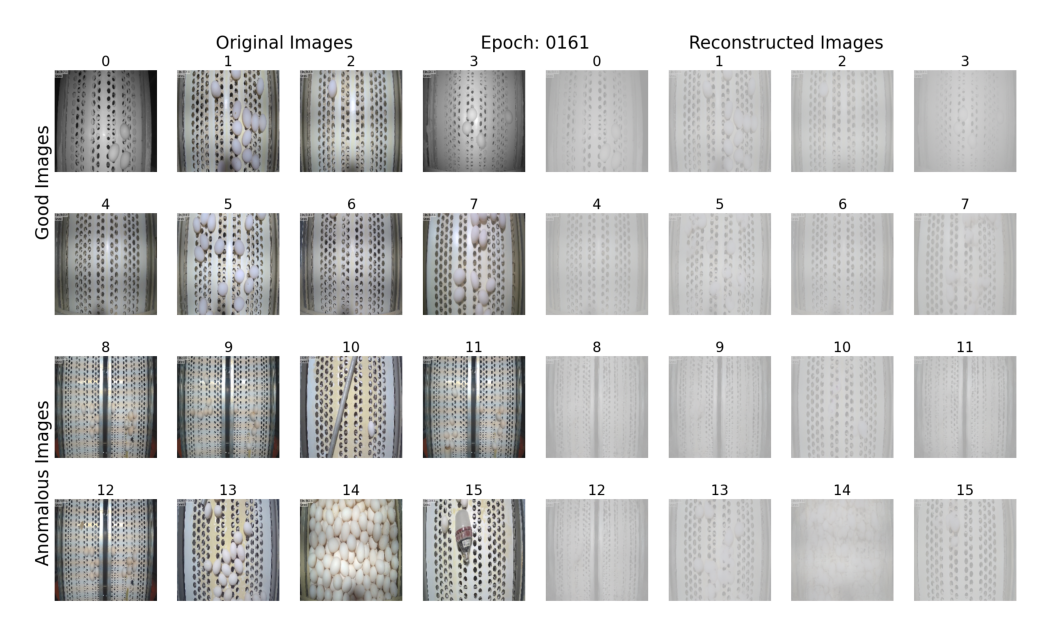

In [31]:
# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(16, 8))  # You can adjust the size as needed

plt.imshow(imageio.v3.imread(filenames[-1]))
plt.axis("off")  # Display images
plt.show()

### Plot Losses Over Epochs

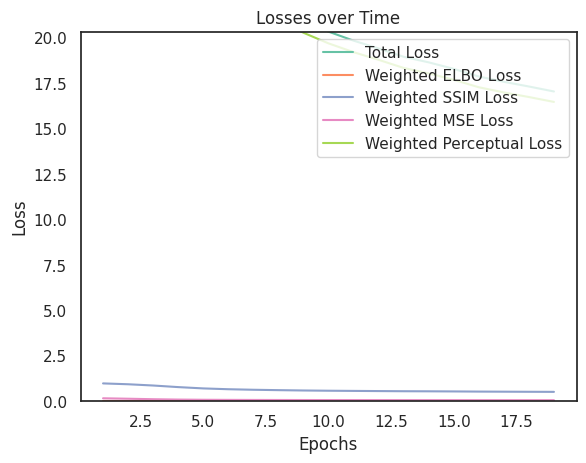

In [32]:
# Read the data from CSV into a DataFrame
data = pd.read_csv(f"{anomaly_detection_directory_root}/loss_data.csv")

# Create weighted losses
data["Weighted ELBO Loss"] = data["ELBO Loss"] * ELBO_LOSS_BIAS
data["Weighted SSIM Loss"] = data["SSIM Loss"] * SSIM_LOSS_BIAS
data["Weighted MSE Loss"] = data["MSE Loss"] * MSE_LOSS_BIAS
data["Weighted Perceptual Loss"] = data["Perceptual Loss"] * PERCEPTUAL_LOSS_BIAS

# Melt the DataFrame
melted_data = data.melt(
    id_vars="Epoch",
    value_vars=["Total Loss", "Weighted ELBO Loss", "Weighted SSIM Loss", "Weighted MSE Loss", "Weighted Perceptual Loss"],
    var_name="Loss Type",
    value_name="Loss",
    col_level=None)

# Set the plot style and color palette
sns.set(style="white")
sns.set_palette("Set2")

# Plot the losses
ax = sns.lineplot(data=melted_data, x="Epoch", y="Loss", hue="Loss Type")

# Add labels and title
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Losses over Time")

# Set maximum y-value
plt.ylim(0, max(melted_data[melted_data["Epoch"] == 10]["Loss"]))

# Adjust the legend location
plt.legend(loc="upper right")

# Display the plot
plt.show()

In [33]:
# prompt: create variables for the best of each loss from the last values of the loss_data.csv file

# Create variables for the best of each loss from the last values of the loss_data.csv file
best_combined_loss = data.iloc[-1]["Total Loss"]
best_elbo_loss = data.iloc[-1]["ELBO Loss"]
best_ssim_loss = data.iloc[-1]["SSIM Loss"]
best_mse_loss = data.iloc[-1]["MSE Loss"]
best_perceptual_loss = data.iloc[-1]["Perceptual Loss"]
best_weighted_elbo_loss = data.iloc[-1]["Weighted ELBO Loss"]
best_weighted_ssim_loss = data.iloc[-1]["Weighted SSIM Loss"]
best_weighted_mse_loss = data.iloc[-1]["Weighted MSE Loss"]
best_weighted_perceptual_loss = data.iloc[-1]["Weighted Perceptual Loss"]

print(f"Best Loss: {best_combined_loss}")
print(f"Best ELBO Loss: {best_elbo_loss}")
print(f"Best SSIM Loss: {best_ssim_loss}")
print(f"Best MSE Loss: {best_mse_loss}")
print(f"Best Perceptual Loss: {best_perceptual_loss}")


Best Loss: 17.0379
Best ELBO Loss: 0.0
Best SSIM Loss: 0.5165
Best MSE Loss: 0.0581
Best Perceptual Loss: 16.4633


### Compute the Threshold
To generate predictions for the test dataset, a threshold is computed based on the reconstruction errors of the validation dataset. First, the reconstruction errors for each image in the validation dataset are calculated by comparing the original images with their corresponding reconstructed images. The threshold is then determined as the mean of the reconstruction errors plus k times the standard deviation of the reconstruction errors. The parameter k allows for adjusting the threshold's sensitivity to anomalies; a higher k value makes the model less sensitive to anomalies.

Once the threshold is obtained, it is applied to the test dataset for generating predictions. For each test image, the reconstruction error is computed, and the image is classified as anomalous or normal based on whether the reconstruction error exceeds the threshold or not. This approach enables the model to autonomously detect anomalies in unseen data.

For computing the threshold, the following resource was useful:

http://philipperemy.github.io/anomaly-detection/


In [34]:
reconstruction_loss = []

def generate_predictions(dataset, model, threshold):
    predictions = []
    true_labels = []
    for images, labels in dataset:
        reconstructed_images = model(images)

        # TODO: Experiment with other loss functions for reconstruction loss calculation
        reconstruction_loss = tf.keras.losses.mse(images, reconstructed_images)
        reconstruction_loss = tf.reduce_mean(reconstruction_loss, axis=[1, 2])

        # An image is considered an anomaly if the reconstruction loss is greater than the threshold
        anomaly = reconstruction_loss > threshold

        # Save the predictions
        predictions.extend(anomaly.numpy().tolist())

        # Save the true labels
        true_labels.extend(labels.numpy().tolist())

    # Convert the predictions to binary
    predictions = np.where(np.array(predictions) > threshold, 1, 0)

    return predictions, true_labels

# Pass each image in validation dataset through the model and compute reconstruction error
for images, _ in validation_dataset:
    reconstructed_images = model(images)
    error = tf.keras.losses.mse(images, reconstructed_images)
    error = tf.reduce_mean(error, axis=[1, 2])
    reconstruction_loss.extend(error.numpy())

# Convert reconstruction loss to numpy array
reconstruction_loss = np.array(reconstruction_loss)

# Calculate mean and standard deviation
mu, sigma = reconstruction_loss.mean(), reconstruction_loss.std()

for k in k_values:
    # Compute threshold
    threshold = mu + k * sigma
    thresholds.append(threshold)
    print(f"Threshold for k={k:.1f}: {threshold:.4f}")

    good_test_predictions, good_test_true_labels = generate_predictions(test_dataset_good, model, threshold)
    easy_test_predictions, easy_test_true_labels = generate_predictions(test_dataset_easy, model, threshold)
    medium_test_predictions, medium_test_true_labels = generate_predictions(test_dataset_medium, model, threshold)
    hard_test_predictions, hard_test_true_labels = generate_predictions(test_dataset_hard, model, threshold)

    all_good_test_predictions.append(good_test_predictions)
    all_good_test_true_labels.append(good_test_true_labels)
    all_easy_test_predictions.append(easy_test_predictions)
    all_easy_test_true_labels.append(easy_test_true_labels)
    all_medium_test_predictions.append(medium_test_predictions)
    all_medium_test_true_labels.append(medium_test_true_labels)
    all_hard_test_predictions.append(hard_test_predictions)
    all_hard_test_true_labels.append(hard_test_true_labels)

Threshold for k=0.5: 0.1005
Threshold for k=0.6: 0.1043
Threshold for k=0.7: 0.1081
Threshold for k=0.8: 0.1119
Threshold for k=0.9: 0.1157
Threshold for k=1.0: 0.1195
Threshold for k=1.1: 0.1233
Threshold for k=1.2: 0.1271
Threshold for k=1.3: 0.1309
Threshold for k=1.4: 0.1347
Threshold for k=1.5: 0.1385
Threshold for k=1.6: 0.1423
Threshold for k=1.7: 0.1461
Threshold for k=1.8: 0.1499
Threshold for k=1.9: 0.1537
Threshold for k=2.0: 0.1575
Threshold for k=2.1: 0.1613
Threshold for k=2.2: 0.1651
Threshold for k=2.3: 0.1689
Threshold for k=2.4: 0.1728
Threshold for k=2.5: 0.1766
Threshold for k=2.6: 0.1804
Threshold for k=2.7: 0.1842
Threshold for k=2.8: 0.1880
Threshold for k=2.9: 0.1918
Threshold for k=3.0: 0.1956
Threshold for k=3.1: 0.1994
Threshold for k=3.2: 0.2032
Threshold for k=3.3: 0.2070
Threshold for k=3.4: 0.2108
Threshold for k=3.5: 0.2146
Threshold for k=3.6: 0.2184
Threshold for k=3.7: 0.2222
Threshold for k=3.8: 0.2260
Threshold for k=3.9: 0.2298


### Calculate the Metrics
The validation process involves plotting the loss per epoch, which allows for monitoring of the model's training progress. After training, the metrics are calculated for various k values, and the best metrics are selected and printed. The selection of the best k value depends on the desired trade-off between sensitivity to anomalies and potential false positives.

Once the best k value is determined via the best f1 score, the metrics are recalculated using this value to obtain the final evaluation of the model's performance.

The chosen metrics primarily focus on precision and accuracy due to the imbalanced nature of the dataset, where anomalies are less frequent compared to normal examples. Since detecting anomalies is of higher importance, metrics like overall accuracy may not be as critical.

A confusion matrix and AUC ROC curve are plotted to visualize the model's performance, providing additional insights into its effectiveness.

The key components of the model, such as the threshold and the metrics, are recorded to keep track of the results achieved by each model during experimentation. This documentation aids in comparing and selecting the best model configuration.

Overall, the validation approach ensures a thorough evaluation of the model's anomaly detection capabilities, leading to an optimized model with balanced performance on precision and accuracy.

### Performance Metrics

Accuracy: This is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined. It gives a general measure of how well the model is performing. However, it's not a good metric if the classes are imbalanced.

Precision: Also called Positive Predictive Value, it is the proportion of true positives out of all positive results. It tells us about the correctness of our model when it predicts an example to be positive.

Recall: Also known as Sensitivity, True Positive Rate, or Hit Rate. It is the proportion of actual positives that are correctly identified. It tells us how good our model is at predicting the positive class.

F1 Score: The F1 score is the harmonic mean of precision and recall. It tries to find the balance between precision and recall. It's a good metric to use if you have an uneven class distribution.

ROC AUC: Receiver Operating Characteristic-Area Under Curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.


In [35]:
# List of dataset names
dataset_names = ['test_dataset_good', 'test_dataset_easy', 'test_dataset_medium', 'test_dataset_hard']

# List of datasets
datasets = [test_dataset_good, test_dataset_easy, test_dataset_medium, test_dataset_hard]

# Function to generate predictions
def generate_predictions(dataset, model, mu, sigma, k):
    threshold = mu + k * sigma
    predictions = []
    true_labels = []
    for images, labels in dataset:
        reconstructed_images = model(images)
        reconstruction_loss = tf.keras.losses.mse(images, reconstructed_images)
        reconstruction_loss = tf.reduce_mean(reconstruction_loss, axis=[1, 2])

        # An image is considered an anomaly if the reconstruction loss is greater than the threshold
        anomaly = reconstruction_loss > threshold

        # Save the predictions
        predictions.extend(anomaly.numpy().tolist())

        # Save the true labels
        true_labels.extend(labels.numpy().tolist())

    # Convert the predictions to binary
    predictions = np.where(np.array(predictions) > threshold, 1, 0)

    return predictions, true_labels

# Function to print metrics
def print_metric(value, metric, k_value):
    print(f"Best {metric}: {value} at k = {k_value}")

# Initialize dictionaries to store the best metrics for each dataset
best_accuracy = {}
best_precision = {}
best_recall = {}
best_f1 = {}
best_f1_threshold = {}

# Calculate metrics for each dataset
for j in range(len(datasets)):
    print(f"\nMetrics for {dataset_names[j]}:")

    # Generate predictions
    predictions, true_labels = generate_predictions(datasets[j], model, mu, sigma, k_values[j])

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    # Update best metrics
    if accuracy >= best_accuracy.get(dataset_names[j], 0):
        best_accuracy[dataset_names[j]] = accuracy
        print_metric(best_accuracy[dataset_names[j]], "accuracy", k_values[j])
    if precision >= best_precision.get(dataset_names[j], 0):
        best_precision[dataset_names[j]] = precision
        print_metric(best_precision[dataset_names[j]], "precision", k_values[j])
    if recall >= best_recall.get(dataset_names[j], 0):
        best_recall[dataset_names[j]] = recall
        print_metric(best_recall[dataset_names[j]], "recall", k_values[j])
    if f1 >= best_f1.get(dataset_names[j], 0):
        print(f"F1 score for {dataset_names[j]}: {f1}")
        best_f1[dataset_names[j]] = f1
        best_f1_threshold[dataset_names[j]] = k_values[j]
        print_metric(best_f1[dataset_names[j]], "f1", k_values[j])

    print(f"\nBest F1 score for {dataset_names[j]}: {best_f1[dataset_names[j]]} at k = {best_f1_threshold[dataset_names[j]]}")

# Generate predictions again using the best k value for each dataset
test_dataset_good_predictions, test_dataset_good_true_labels = generate_predictions(test_dataset_good, model, mu, sigma, best_f1_threshold['test_dataset_good'])
test_dataset_easy_predictions, test_dataset_easy_true_labels = generate_predictions(test_dataset_easy, model, mu, sigma, best_f1_threshold['test_dataset_easy'])
test_dataset_medium_predictions, test_dataset_medium_true_labels = generate_predictions(test_dataset_medium, model, mu, sigma, best_f1_threshold['test_dataset_medium'])
test_dataset_hard_predictions, test_dataset_hard_true_labels = generate_predictions(test_dataset_hard, model, mu, sigma, best_f1_threshold['test_dataset_hard'])


Metrics for test_dataset_good:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best accuracy: 0.8377777777777777 at k = 0.5
Best precision: 0.0 at k = 0.5
Best recall: 0.0 at k = 0.5
F1 score for test_dataset_good: 0.0
Best f1: 0.0 at k = 0.5

Best F1 score for test_dataset_good: 0.0 at k = 0.5

Metrics for test_dataset_easy:
Best accuracy: 1.0 at k = 0.6
Best precision: 1.0 at k = 0.6
Best recall: 1.0 at k = 0.6
F1 score for test_dataset_easy: 1.0
Best f1: 1.0 at k = 0.6

Best F1 score for test_dataset_easy: 1.0 at k = 0.6

Metrics for test_dataset_medium:
Best accuracy: 0.20520833333333333 at k = 0.7
Best precision: 1.0 at k = 0.7
Best recall: 0.20520833333333333 at k = 0.7
F1 score for test_dataset_medium: 0.3405358686257563
Best f1: 0.3405358686257563 at k = 0.7

Best F1 score for test_dataset_medium: 0.3405358686257563 at k = 0.7

Metrics for test_dataset_hard:
Best accuracy: 0.18645833333333334 at k = 0.7999999999999999
Best precision: 1.0 at k = 0.7999999999999999
Best recall: 0.18645833333333334 at k = 0.7999999999999999
F1 score for test_dataset_hard: 0.

### Generate Predictions Again With Best k Value

#### Performance Metrics
* Accuracy: This is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined. It gives a general measure of how well the model is performing. However, it's not a good metric if the classes are imbalanced.
* Precision: Also called Positive Predictive Value, it is the proportion of true positives out of all positive results. It tells us about the correctness of our model when it predicts an example to be positive.
* Recall: Also known as Sensitivity, True Positive Rate, or Hit Rate. It is the proportion of actual positives that are correctly identified. It tells us how good our model is at predicting the positive class.
* F1 Score: The F1 score is the harmonic mean of precision and recall. It tries to find the balance between precision and recall. It's a good metric to use if you have an uneven class distribution.
* ROC AUC: Receiver Operating Characteristic-Area Under Curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

### Plot Confusion Matrix

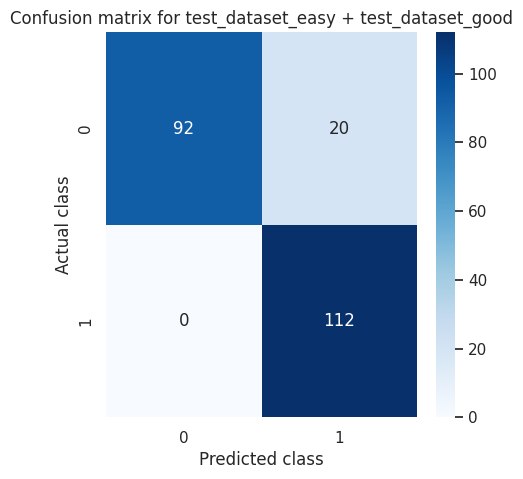

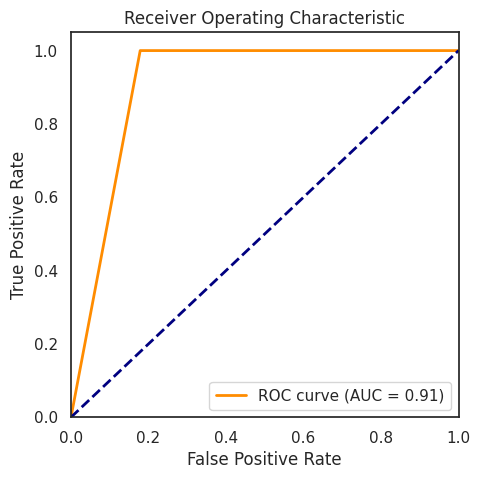

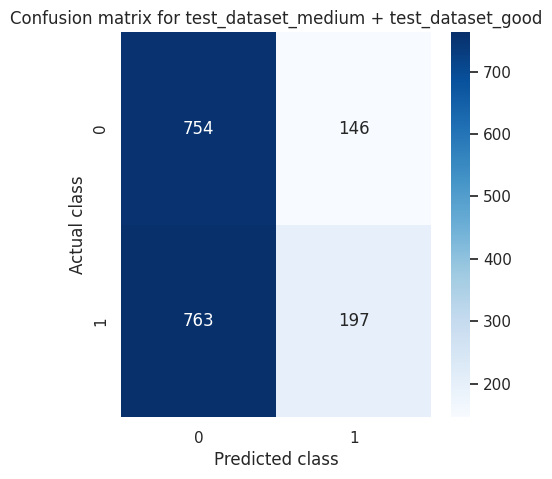

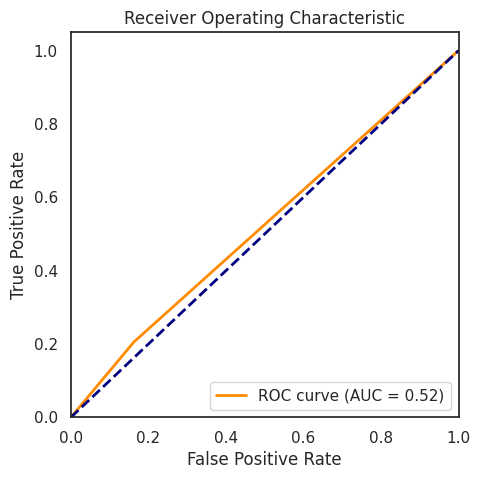

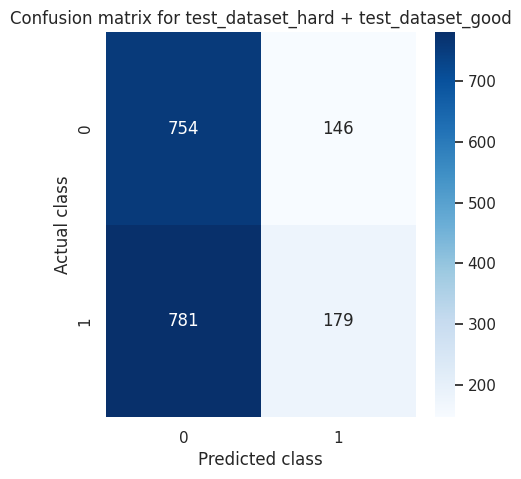

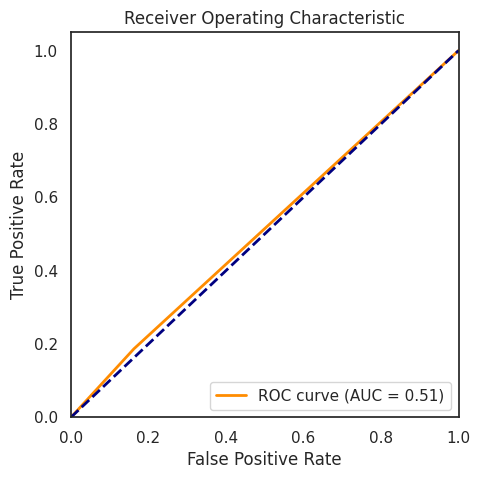

In [36]:
# Class labels for each dataset
anomalous_dataset_labels = ['test_dataset_easy', 'test_dataset_medium', 'test_dataset_hard']
good_dataset_label = 'test_dataset_good'

# Combine each anomalous dataset with the 'test_dataset_good'
for anomalous_dataset_label in anomalous_dataset_labels:
    # Extract predictions and true labels for the anomalous dataset
    anomalous_predictions = eval(anomalous_dataset_label + "_predictions")
    anomalous_true_labels = eval(anomalous_dataset_label + "_true_labels")
    anomalous_data_length = len(anomalous_predictions)

    # Extract predictions and true labels for the 'test_dataset_good'
    good_predictions = eval(good_dataset_label + "_predictions")[:anomalous_data_length]
    good_true_labels = eval(good_dataset_label + "_true_labels")[:anomalous_data_length]

    # Concatenate the predictions and true labels
    combined_predictions = np.concatenate((good_predictions, anomalous_predictions))
    combined_true_labels = np.concatenate((good_true_labels, anomalous_true_labels))

    # Compute confusion matrix
    conf_matrix = confusion_matrix(combined_true_labels, combined_predictions)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion matrix for {anomalous_dataset_label} + {good_dataset_label}")
    plt.ylabel("Actual class")
    plt.xlabel("Predicted class")
    plt.show()

    # Compute ROC curve and ROC AUC
    fpr, tpr, thresholds = roc_curve(combined_true_labels, combined_predictions)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

### Plot Reconstruction Errors

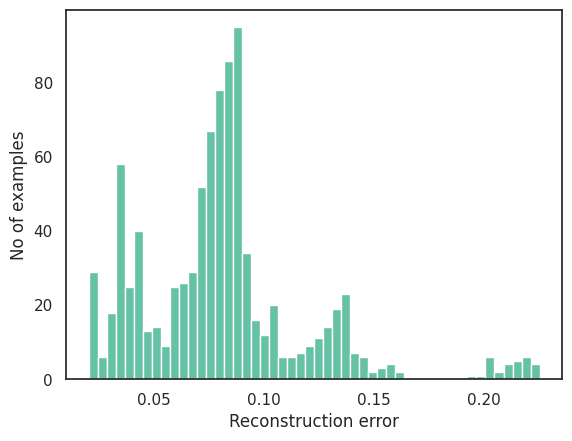

In [37]:
plt.hist(reconstruction_loss, bins=50)
plt.xlabel("Reconstruction error")
plt.ylabel("No of examples")
plt.show()

### Log Metrics to wandb

In [38]:
wandb.log({
    "epochs": EPOCHS,
    "latent_dimension": LATENT_DIM,
    "encoder_kernel_size": ENCODER_KERNEL_SIZE,
    "decoder_kernel_size": DECODER_KERNEL_SIZE,
    "encoder_stride_size": ENCODER_STRIDE_SIZE,
    "decoder_stride_size": DECODER_STRIDE_SIZE,
    "activation_function": activation_function,
    "dropout_rate": DROPOUT_RATE,
    "train_loss": best_combined_loss,
    "elbo_loss": best_elbo_loss,
    "weighted_elbo_loss": best_elbo_loss * ELBO_LOSS_BIAS,
    "ssim_loss": best_ssim_loss,
    "weighted_ssim_loss": best_ssim_loss * SSIM_LOSS_BIAS,
    "mse_loss": best_mse_loss,
    "weighted_mse_loss": best_mse_loss * MSE_LOSS_BIAS,
    "perceptual_loss": best_perceptual_loss,
    "weighted_perceptual_loss": best_perceptual_loss * PERCEPTUAL_LOSS_BIAS,
    "elbo_loss_bias": ELBO_LOSS_BIAS,
    "ssim_loss_bias": SSIM_LOSS_BIAS,
    "mse_loss_bias": MSE_LOSS_BIAS,
    "perceptual_loss_bias": PERCEPTUAL_LOSS_BIAS,
    "k_value": best_f1_threshold['test_dataset_good'],
    "accuracy": best_accuracy['test_dataset_good'],
    "precision": best_precision['test_dataset_good'],
    "recall": best_recall['test_dataset_good'],
    "f1": best_f1['test_dataset_good'],
    "k_value": best_f1_threshold['test_dataset_easy'],
    "accuracy": best_accuracy['test_dataset_easy'],
    "precision": best_precision['test_dataset_easy'],
    "recall": best_recall['test_dataset_easy'],
    "f1": best_f1['test_dataset_easy'],
    "k_value": best_f1_threshold['test_dataset_medium'],
    "accuracy": best_accuracy['test_dataset_medium'],
    "precision": best_precision['test_dataset_good'],
    "recall": best_recall['test_dataset_medium'],
    "f1": best_f1['test_dataset_medium'],
    "k_value": best_f1_threshold['test_dataset_hard'],
    "accuracy": best_accuracy['test_dataset_hard'],
    "precision": best_precision['test_dataset_hard'],
    "recall": best_recall['test_dataset_hard'],
    "f1": best_f1['test_dataset_hard'],
})

# Finish the wandb run
wandb.finish()

### Print Metrics and Model Info

Here we print the metrics and model info for the model we just trained and tested. Having this information in one place is useful for comparing models.

In [39]:
print(f"\nEpochs: {EPOCHS}")
print(f"Latent Dimension: {LATENT_DIM}")
print(f"Encoder Kernel Size: {ENCODER_KERNEL_SIZE}")
print(f"Decoder Kernel Size: {DECODER_KERNEL_SIZE}")
print(f"Encoder Stride Size: {ENCODER_STRIDE_SIZE}")
print(f"Decoder Stride Size: {DECODER_STRIDE_SIZE}")
print(f"Activation Function: {activation_function}")

print(f"Dropout Rate: {DROPOUT_RATE}")
print(f"Train Loss: {best_combined_loss}")
print(f"ELBO_Loss: {best_elbo_loss}")
print(f"Weighted_main_loss: {best_elbo_loss * ELBO_LOSS_BIAS}"),
print(f"Perceptual_loss: {best_perceptual_loss}")
print(f"Weighted_perceptual_loss: {best_perceptual_loss * PERCEPTUAL_LOSS_BIAS}"),
print("\ntest_dataset_good metrics")
print(f"Threshold: {best_f1_threshold['test_dataset_good']:.4f}")
print(f"Accuracy: {best_accuracy['test_dataset_good']:.4f}")
print(f"Precision: {best_precision['test_dataset_good']:.4f}")
print(f"Recall: {best_recall['test_dataset_good']:.4f}")
print(f"F1: {best_f1['test_dataset_good']:.4f}")
print("\ntest_dataset_easy metrics")
print(f"Threshold: {best_f1_threshold['test_dataset_easy']:.4f}")
print(f"Accuracy: {best_accuracy['test_dataset_easy']:.4f}")
print(f"Precision: {best_precision['test_dataset_easy']:.4f}")
print(f"Recall: {best_recall['test_dataset_easy']:.4f}")
print(f"F1: {best_f1['test_dataset_easy']:.4f}")
print("\ntest_dataset_medium metrics")
print(f"Threshold: {best_f1_threshold['test_dataset_medium']:.4f}")
print(f"Accuracy: {best_accuracy['test_dataset_medium']:.4f}")
print(f"Precision: {best_precision['test_dataset_medium']:.4f}")
print(f"Recall: {best_recall['test_dataset_medium']:.4f}")
print(f"F1: {best_f1['test_dataset_medium']:.4f}")
print("\ntest_dataset_hard metrics")
print(f"Threshold: {best_f1_threshold['test_dataset_hard']:.4f}")
print(f"Accuracy: {best_accuracy['test_dataset_hard']:.4f}")
print(f"Precision: {best_precision['test_dataset_hard']:.4f}")
print(f"Recall: {best_recall['test_dataset_hard']:.4f}")
print(f"F1: {best_f1['test_dataset_hard']:.4f}")


Epochs: 500
Latent Dimension: 64
Encoder Kernel Size: 4
Decoder Kernel Size: 3
Encoder Stride Size: 2
Decoder Stride Size: 2
Activation Function: leaky_relu
Dropout Rate: 0.2
Train Loss: 17.0379
ELBO_Loss: 0.0
Weighted_main_loss: 0.0
Perceptual_loss: 16.4633
Weighted_perceptual_loss: 16.4633

test_dataset_good metrics
Threshold: 0.5000
Accuracy: 0.8378
Precision: 0.0000
Recall: 0.0000
F1: 0.0000

test_dataset_easy metrics
Threshold: 0.6000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

test_dataset_medium metrics
Threshold: 0.7000
Accuracy: 0.2052
Precision: 1.0000
Recall: 0.2052
F1: 0.3405

test_dataset_hard metrics
Threshold: 0.8000
Accuracy: 0.1865
Precision: 1.0000
Recall: 0.1865
F1: 0.3143


#### Baseline Results
Initially, tthe simple autoencoder lacked the necessary complexity to capture the complexity of the images in my dataset. By increasing the model's complexity through additional convolutional layers and a larger latent space, a notable improvement in results was observed. However, despite these enhancements, the model still faced challenges with blurry reconstructions and difficulty reconstructing single eggs that were isolated from others.

#### Improved Results
To address the limitations of the initial model, further improvements were made. The introduction of residual layers played a crucial role in solving the vanishing gradient problem, leading to another substantial leap in performance. This improvement resulted in sharper reconstructions and better reconstruction of single eggs.

#### Summary of Findings
While the current model's performance is encouraging, there is considerable room for further enhancement. Despite the initial struggles, the progress made is satisfactory. The model demonstrates a decent ability to detect anomalies, surpassing the initial expectations. However, the problem is not entirely solved, and I plan to continue optimizing the model architecture and tuning the model parameters.

#### Limitations and Future Directions:
The model's performance can be further refined in multiple ways. Expanding the dataset to include diverse environments with various conveyor belts, lighting conditions, and egg colors would enhance the model's adaptability in real-world scenarios. Additionally, ongoing optimization of the model architecture and parameter tuning will likely lead to improved results.

A significant limitation faced during the project was the limited access to suitable hardware for training the model. The laptop's limited GPU memory imposed restrictions on the model size. While this constraint presented challenges, it also forced me to research efficient data loading and model training approaches, as well as methods in limiting the amount of memory used by the GPU. With a more optimized model, and more diverse training set, and better training hardware, I believe many improvements could still be made to the project. Additionally, in real-world scenarios the model will be running on a video stream captured by an edge device, so the model would have to be adapted to inference from the video stream and be efficient enough where many instances of the model could be run on one device, since each device runs multiple cameras.
